In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.base import BaseEstimator
from sklearn.base import ClusterMixin
from sklearn.metrics.pairwise import pairwise_distances

class Kmeans(BaseEstimator, ClusterMixin): 

    #squared euclidean dist between each point in array A and point z
    def dist(self, A, z):
        return (((A - z)**2).sum(axis = 1))
    
    
    def __init__(self, k=2, metric='euclidean', max_iter=1000, random_state=None, eps=0.0001):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """
        
        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.eps = eps

        self.n_iter = 0
        
    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """
        
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)
        
        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])
        
        # Массив с центройдами кластеров
        self.centroids = np.random.rand(self.k, X.shape[1])
        for i in xrange(X.shape[1]):
            self.centroids[:,i] *= X[:,i].mean()
        
        for i in xrange(X.shape[0]):        
            min_dist_idx = np.array(self.dist(self.centroids, X[i])).argmin()
            self.labels[i] = min_dist_idx
                 
        for j in xrange(self.max_iter):   
            err = -1
            
            for i in xrange(self.k):
                mn = X[(self.labels == i)].mean(axis = 0)
                err = max(err, self.dist([mn], self.centroids[i])[0])
                
                self.centroids[i] = mn
            
            for i in xrange(X.shape[0]):
                min_dist_idx = np.array(self.dist(self.centroids, X[i])).argmin()
                self.labels[i] = min_dist_idx
            
            if abs(err) < self.eps:
                self.n_iter = j
                break
    
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера
        
        Возвращает метку ближайшего кластера для каждого объекта
        """
        
        mark = np.ones(X.shape[0], dtype=int) * (-1)
        
        for i in xrange(X.shape[0]):
            min_dist_idx = np.array(self.dist(self.centroids, X[i])).argmin()
            mark[i] = min_dist_idx
        
        return mark

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

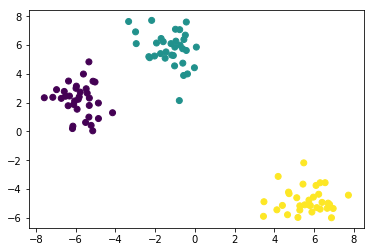

In [5]:
plt.scatter(X[:,0], X[:, 1], c=y)

In [6]:
K = Kmeans(3, max_iter=20)

In [7]:
K.fit(X)

Kmeans(eps=0.0001, k=3, max_iter=20, metric='euclidean', random_state=None)

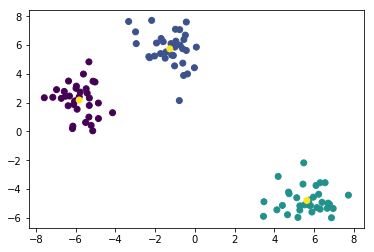

In [8]:
plt.scatter(np.append(X[:,0], K.centroids[:,0]), np.append(X[:, 1], K.centroids[:,1]), c=np.append(y, [4, 4, 4]))

In [9]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [10]:
X = df_sns.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)

In [11]:
X = (X - X.mean()) / X.std()

In [12]:
sk = Kmeans(k = 9, max_iter=80)

In [51]:
sk.fit(np.array(X))

Kmeans(eps=0.0001, k=9, max_iter=80, metric='euclidean', random_state=None)

In [14]:
df_sns.columns

Index([u'gradyear', u'gender', u'age', u'friends', u'basketball', u'football',
       u'soccer', u'softball', u'volleyball', u'swimming', u'cheerleading',
       u'baseball', u'tennis', u'sports', u'cute', u'sex', u'sexy', u'hot',
       u'kissed', u'dance', u'band', u'marching', u'music', u'rock', u'god',
       u'church', u'jesus', u'bible', u'hair', u'dress', u'blonde', u'mall',
       u'shopping', u'clothes', u'hollister', u'abercrombie', u'die', u'death',
       u'drunk', u'drugs'],
      dtype='object')

In [56]:
sk.centroids[3]

array([ 1.45153319,  1.96402842,  0.03152847,  0.01371937,  0.03267732,
        0.03452133,  0.10179292,  1.74143081,  0.30705246,  1.08268854,
       -0.07120313, -0.01686738, -0.01524761, -0.07427554, -0.08569839,
       -0.04146005, -0.07446275, -0.11793635,  0.07341459,  0.19954247,
       -0.01599119,  0.07629368, -0.0197777 , -0.05757661, -0.002133  ,
       -0.09690121,  0.0384397 , -0.05499839, -0.11892211, -0.04674913,
       -0.1188507 , -0.1307788 , -0.05820058, -0.06988501, -0.06134304,
       -0.0968595 ])

In [57]:
sk.centroids[3].argmax()

1

In [55]:
df_sns.loc[sk.labels == 3,['football', 'basketball']].head()

,football,basketball
31,3,3
36,1,1
46,0,0
49,3,1
58,3,0


In [92]:
sk.centroids[2].argmax()

2

In [93]:
df_sns.loc[sk.labels == 2,'soccer'].head()

42     4
67     3
92     3
278    5
413    5
Name: soccer, dtype: int64

In [94]:
sk.centroids[5].argmax()

3

In [95]:
df_sns.loc[sk.labels == 5,'softball'].head()

83     1
109    0
132    3
145    4
168    1
Name: softball, dtype: int64

In [106]:
sk.centroids[6].argmax()

14

In [107]:
df_sns.loc[sk.labels == 6,['kissed']].head()

,kissed
4,5
27,1
39,2
57,3
116,2
